In [1]:
import pandas as pd
import numpy as np
import pickle
import warnings

warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import (
    adjusted_rand_score,
    silhouette_score,
    davies_bouldin_score,
    normalized_mutual_info_score,
)


## Loading Training Data

In [ ]:
X_train = pd.read_csv(
    "/home/samir-dahal/Diabetes_Classification/data/processed/X_train_original.csv"
)
y_train = pd.read_csv(
    "/home/samir-dahal/Diabetes_Classification/data/processed/y_train_original.csv"
)["CLASS_encoded"]

# Train k-means clustering 

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10, max_iter=300)
clusters = kmeans.fit_predict(X_train)

In [10]:
pd.Series(clusters).value_counts().sort_index()

0     14
1    188
2    566
Name: count, dtype: int64

##  Evaluate on Training Data

In [11]:
ari = adjusted_rand_score(y_train, clusters)
silhouette = silhouette_score(X_train, clusters)
davies_bouldin = davies_bouldin_score(X_train, clusters)
nmi = normalized_mutual_info_score(y_train, clusters)

In [12]:
metrics = {
    "Algorithm": "K-Means",
    "ARI": ari,
    "Silhouette": silhouette,
    "Davies_Bouldin": davies_bouldin,
    "NMI": nmi,
    "Inertia": kmeans.inertia_,
}

In [13]:
metrics

{'Algorithm': 'K-Means',
 'ARI': 0.5558749464940614,
 'Silhouette': 0.17306756326942915,
 'Davies_Bouldin': 1.5861679535881128,
 'NMI': 0.43646848200216354,
 'Inertia': 6763.99017495972}

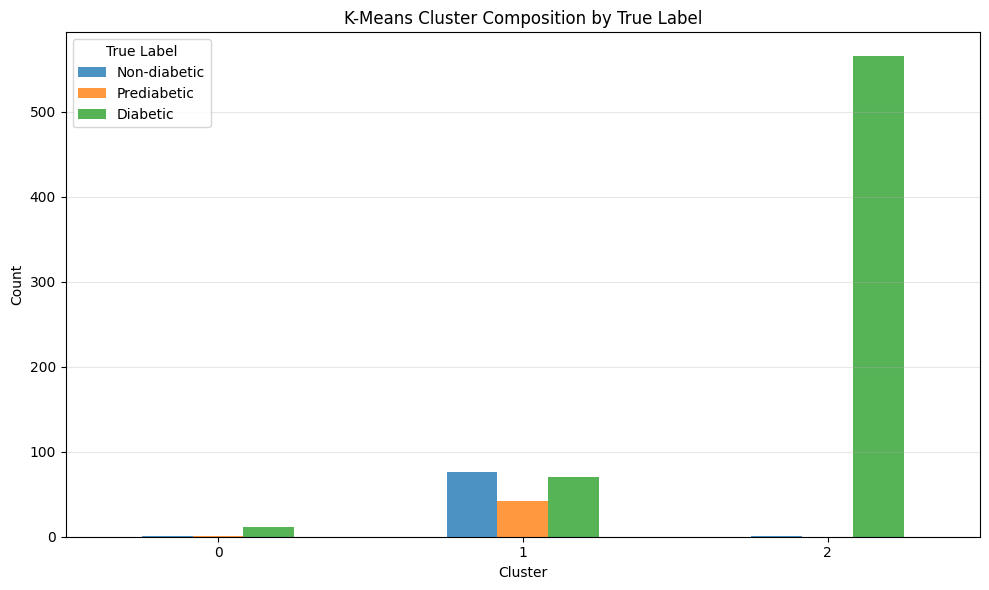

In [22]:
# Cluster composition - grouped bar chart
import matplotlib.pyplot as plt
label_names = {0: "Non-diabetic", 1: "Prediabetic", 2: "Diabetic"}
cluster_df = pd.DataFrame({"Cluster": clusters, "True_Label": y_train})

# Create crosstab
composition = pd.crosstab(cluster_df["Cluster"], cluster_df["True_Label"])
composition.columns = [label_names[col] for col in composition.columns]

# Plot
composition.plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("K-Means Cluster Composition by True Label")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="True Label")
plt.xticks(rotation=0)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

## Save Model and Metrics

In [ ]:
model_path = (
    "/home/samir-dahal/Diabetes_Classification/models/clustering/kmeans_model.pkl"
)
with open(model_path, "wb") as f:
    pickle.dump(kmeans, f)

metrics_df = pd.DataFrame([metrics])
metrics_path = "/home/samir-dahal/Diabetes_Classification/results/clustering_results/clustering_metrics.csv"
metrics_df.to_csv(metrics_path, index=False)
